# About the dataset
The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females and are at least 21 years old.

# About the Variables
1- Pregnancies: To express the Number of pregnancies

2-Glucose: To express the Glucose level in blood

3-BloodPressure: To express the Blood pressure measurement

4-SkinThickness: To express the thickness of the skin

5-Insulin: To express the Insulin level in blood

6-BMI: To express the Body mass index

7-DiabetesPedigreeFunction: To express the Diabetes percentage

8-Age: To express the age

9-Outcome: To express the final result 1 is Yes and 0 is No

Importing of the necessary libraries.

In [7]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#Loading of the Diabetes Dataset and getting the first 5 rows.

In [8]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Checking for Null Values

In [9]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Getting the summary statistics.

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Plotting of the Box Plot

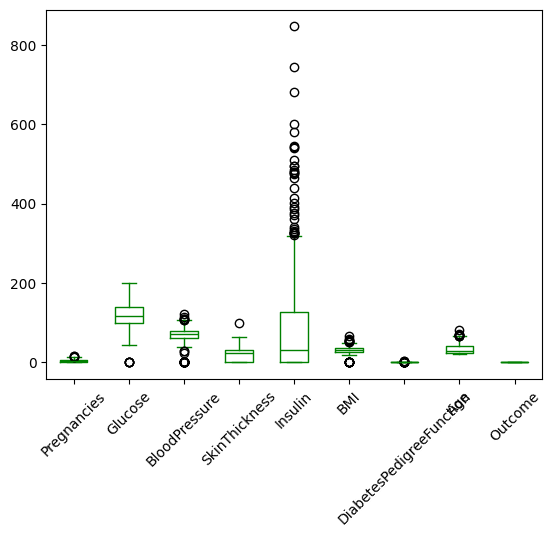

In [11]:
df.plot(kind='box', rot=45,color='green')
plt.show()

In [13]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Seperate features X and target variable Y

In [15]:
features=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
X=df[features]
Y=df['Outcome']


Splitting the data into Training Data and Testing Data


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Comparison between Support Vector Machine and Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression()


In [19]:
from sklearn.svm import SVC
model_SVM = SVC()



## Evaulation

In [20]:
alg = ['LogisticRegression','SVC']
acc = []
rec= []
F1 = []

In [22]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score,accuracy_score


def evaluate(model):
  model.fit(X_train,y_train)
  pre = model.predict(X_test)
  accuracy = accuracy_score(pre,y_test)
  recall = recall_score(pre,y_test)
  f1 = f1_score(pre,y_test)

  acc.append(accuracy)
  rec.append(recall)
  F1.append(f1)
    
  sns.heatmap(confusion_matrix(pre,y_test),annot=True)
  print(model)
  print('Accuracy : ',accuracy,'Recall : ',recall,"F1 : ",f1)


C:\Users\win10\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()
Accuracy :  0.7467532467532467 Recall :  0.6379310344827587 F1 :  0.6548672566371682


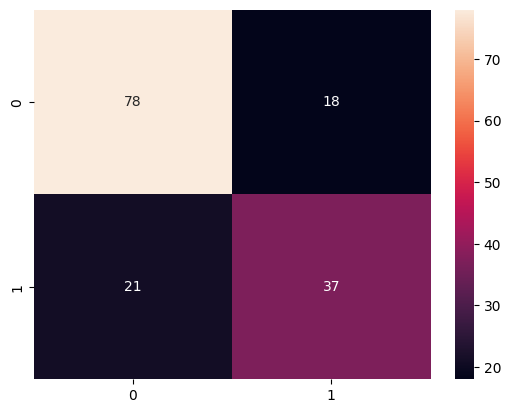

In [23]:
evaluate(model_LR)


SVC()
Accuracy :  0.7662337662337663 Recall :  0.7209302325581395 F1 :  0.6326530612244898


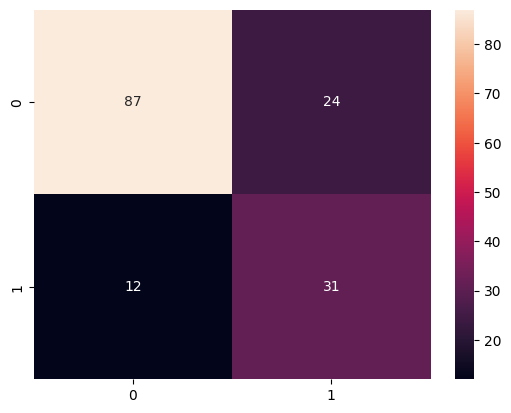

In [24]:
evaluate(model_SVM)


In [25]:
final_result = pd.DataFrame({"Algorithm":alg ,'Accuarcy':acc,"recall":rec,"F1_score":F1})
final_result

,Algorithm,Accuarcy,recall,F1_score
0,LogisticRegression,0.746753,0.637931,0.654867
1,SVC,0.766234,0.720930,0.632653


## Normalization

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [38]:
alg = ['LogisticRegression','SVC']
acc = []
rec= []
F1 = []

In [39]:
def evaluate(model):
  model.fit(X_train_scaled,y_train)
  pre = model.predict(X_test_scaled)
  accuracy = accuracy_score(pre,y_test)
  recall = recall_score(pre,y_test)
  f1 = f1_score(pre,y_test)

  acc.append(accuracy)
  rec.append(recall)
  F1.append(f1)
    
  sns.heatmap(confusion_matrix(pre,y_test),annot=True)
  print(model)
  print('Accuracy : ',accuracy,'Recall : ',recall,"F1 : ",f1)

LogisticRegression()
Accuracy :  0.7532467532467533 Recall :  0.6491228070175439 F1 :  0.6607142857142857


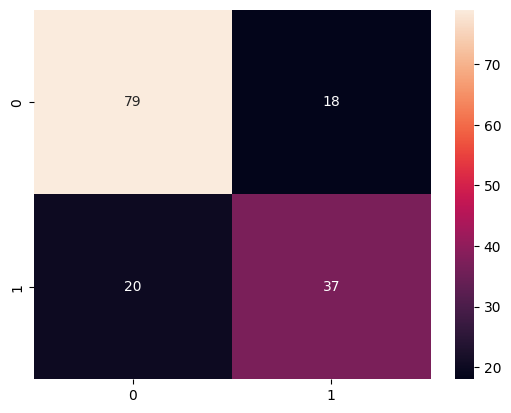

In [40]:
evaluate(model_LR)


SVC()
Accuracy :  0.7337662337662337 Recall :  0.6458333333333334 F1 :  0.6019417475728155


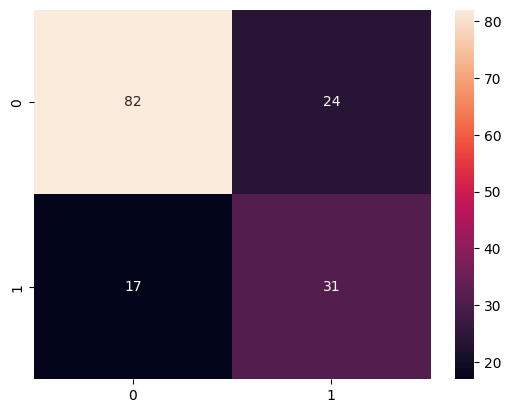

In [41]:
evaluate(model_SVM)

In [42]:
final_result = pd.DataFrame({"Algorithm":alg ,'Accuarcy':acc,"recall":rec,"F1_score":F1})
final_result

,Algorithm,Accuarcy,recall,F1_score
0,LogisticRegression,0.753247,0.649123,0.660714
1,SVC,0.733766,0.645833,0.601942
